In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode(connected = True)
from collections import Counter

## Data Loading and Cleaning

In [3]:
show=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
show.isnull().sum()/len(show)*100.0

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

***'director'*** ,***'cast'*** ,***'country'***,***date_added'*** and ***'rating'*** *contains the* ***Missing Values Completely at Random (MCAR)*** *as there is no relation amongst these variables as well as each of them with other variables.* 

*Since the values in* **'director'** *column are more in number* ***(approx 31%)*** *so they can contain valid information therefore they can't be dropped,
instead we can drop other columns as it will not cause much effect in overall distribution.*

In [5]:
#replacing the missing values which are greater in number with unknown and dropping the less number of values
show['director']=show['director'].fillna('Unknown')
show=show.dropna()

In [6]:
show.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
#date_added is broken down into month,year and day and then dropped along with show_id
show['Added_Year']=show['date_added'].apply(lambda x: x.split(', ')[-1])
show['Added_Month']=show['date_added'].apply(lambda x: x.split(' ')[0])
show['Added_Day']=show['date_added'].apply(lambda x:x.lstrip().split(' ')[1])
show['Added_Day']=show['Added_Day'].apply(lambda x:x.split(',')[0])
show.drop(columns=['show_id','date_added'],inplace=True)

In [8]:
show.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Added_Year,Added_Month,Added_Day
0,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,14
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,1


In [9]:
show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6643 non-null   object
 1   title         6643 non-null   object
 2   director      6643 non-null   object
 3   cast          6643 non-null   object
 4   country       6643 non-null   object
 5   release_year  6643 non-null   int64 
 6   rating        6643 non-null   object
 7   duration      6643 non-null   object
 8   listed_in     6643 non-null   object
 9   description   6643 non-null   object
 10  Added_Year    6643 non-null   object
 11  Added_Month   6643 non-null   object
 12  Added_Day     6643 non-null   object
dtypes: int64(1), object(12)
memory usage: 726.6+ KB


***'Added_Year'*** *and* ***'Added_Day'*** *are of incorrect format.*

In [10]:
show['Added_Year']=show['Added_Year'].astype(int)
show['Added_Day']=show['Added_Day'].astype(int)

In [11]:
show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6643 entries, 0 to 7785
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6643 non-null   object
 1   title         6643 non-null   object
 2   director      6643 non-null   object
 3   cast          6643 non-null   object
 4   country       6643 non-null   object
 5   release_year  6643 non-null   int64 
 6   rating        6643 non-null   object
 7   duration      6643 non-null   object
 8   listed_in     6643 non-null   object
 9   description   6643 non-null   object
 10  Added_Year    6643 non-null   int64 
 11  Added_Month   6643 non-null   object
 12  Added_Day     6643 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 726.6+ KB


## Does netflix contain more TV shows or Movies??

<AxesSubplot:xlabel='type', ylabel='count'>

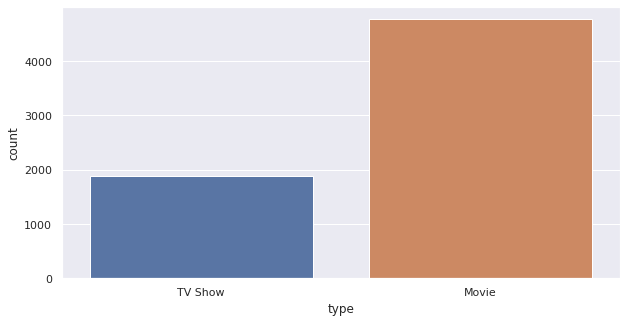

In [12]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(x='type',data=show)

*Here it can be seen that netflix has more significant number of movies than TV shows.*

## What is the majority audience in netflix??

<AxesSubplot:xlabel='count', ylabel='rating'>

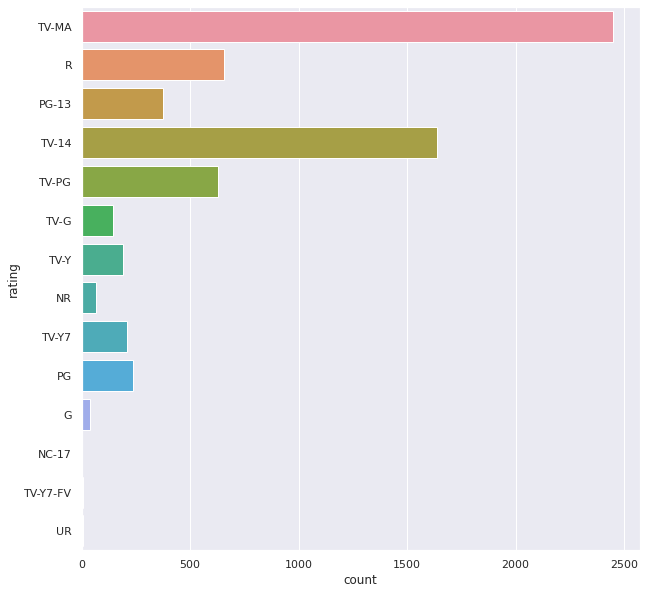

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(y='rating',data=show)

*Most of the content listed on netflix is* ***TV-MA rated i.e. Mature Audience and only suitable for age above 18.***

*Followed by* ***TV-14 rating i.e. Parents Strongly Cautioned and only suitable for age 14 and above***.

*Least content is of* ***G rating i.e. General Audiences and suitable for all ages.***

*as assigned by Motion Picture Association of America(MPAA).*

## Which country produces maximum content?

In [14]:
#selecting top 10 most content producing countries
countries_count_percent=show['country'].value_counts(normalize=True).sort_values(ascending=False)[:10]
c_df=pd.DataFrame(countries_count_percent*100)
c_df

,country
United States,33.749812
India,13.457775
United Kingdom,4.982689
Japan,3.311757
South Korea,2.709619
Canada,2.393497
Spain,1.761252
Egypt,1.505344
Turkey,1.505344
France,1.490291


***United States produces approx 34% content in netflix followed by India(approx 13.5%) and UK(approx 5%)*** *amongst the top ten content producing countries on netflix.*

## After release when does the content is added into netflix??

In [15]:
show['show_diff']=abs(show['Added_Year']-show['release_year'])
show_diff_percent=show['show_diff'].value_counts(normalize=True).sort_values(ascending=False)[:10]
show_diff_percent*100

0    34.126148
1    18.831853
2     8.249285
3     5.720307
4     4.425711
5     3.025741
6     2.950474
8     2.318230
7     2.258016
9     1.972001
Name: show_diff, dtype: float64

***34% of TV shows or movies are either released on Netflix or they were added months after their release in the same year.***

***Followed by 18% of shows or movies are added on netflix after 1 year of their release.***

## In which year maximum content is released?

Text(0, 0.5, 'Year of Release')

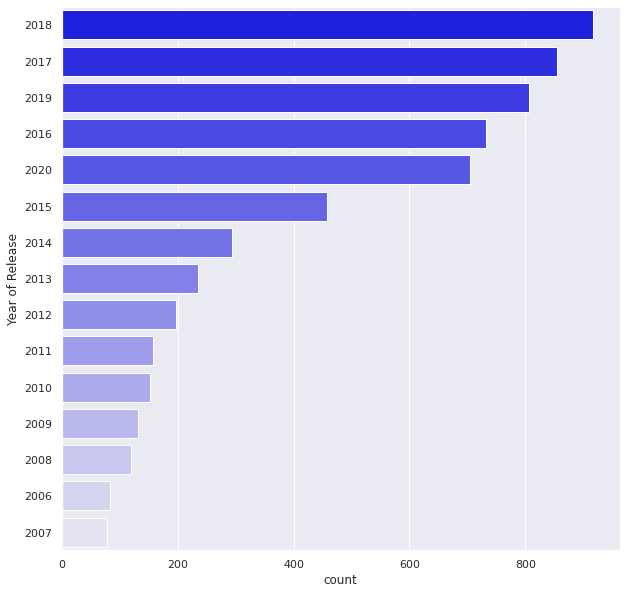

In [16]:
plt.figure(figsize=(10,10))
p=sns.light_palette(color='blue',n_colors=16,reverse=True)
sns.countplot(y='release_year',data=show,palette=p,order=show['release_year'].value_counts().index[:15])
plt.ylabel("Year of Release")

*In **2018** maximum content was released outside netflix.*

## In which year maximum content is added on netflix?

Text(0, 0.5, 'Year of Addition on Netflix')

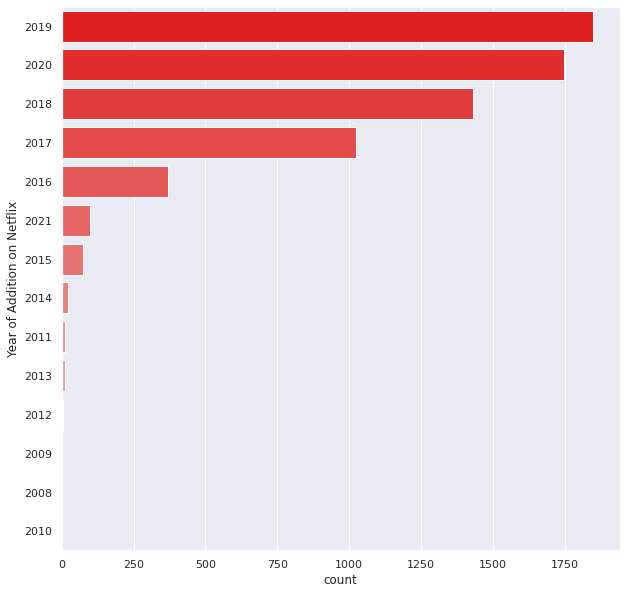

In [17]:
plt.figure(figsize=(10,10))
p=sns.light_palette(color='red',n_colors=16,reverse=True)
sns.countplot(y='Added_Year',data=show,palette=p,order=show['Added_Year'].value_counts().index[:15])
plt.ylabel('Year of Addition on Netflix')

*In* ***2019*** *maximum content were added in netflix.*

## Popular Genres in Netflix

Text(0, 0.5, 'Genre')

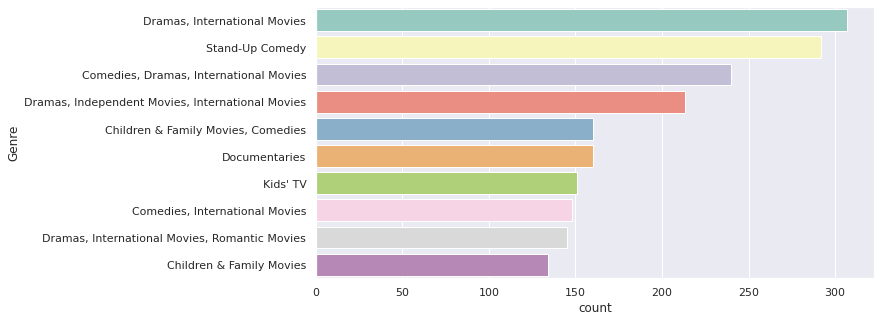

In [18]:
genre=show.groupby('listed_in')['type'].count().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10,5))
sns.countplot(y='listed_in',palette='Set3',data=show,order=genre)
plt.ylabel('Genre')

*Majority of the audience watch content related to* ***Drama and International Movies*** *followed by* ***Stand-Up Comedies.***

## Popular Directors 

In [19]:
#Top 20 popular directors
md=[i for i in show.director if i!='Unknown']
director_frequency = Counter(', '.join(md).split(', '))
print("Top 20 directors globally in Netflix:")
director_frequency.most_common(20)

Top 20 directors globally in Netflix:


[('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Jay Karas', 15),
 ('Marcus Raboy', 15),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 10),
 ('Shannon Hartman', 9),
 ('Anurag Kashyap', 9),
 ('David Dhawan', 9),
 ('Justin G. Dyck', 8),
 ('Umesh Mehra', 8),
 ('Hakan Algül', 8),
 ('Ryan Polito', 8),
 ('Johnnie To', 8),
 ('Yılmaz Erdoğan', 8),
 ('Robert Rodriguez', 8),
 ('Kunle Afolayan', 7)]

***Raul Campos*** *and* ***Jan Suter*** *has helmed majority of content in netflix amongst other popular directors.*

## Popular Actors

In [20]:
#Top 20 popular actors
actor_frequency = Counter(', '.join(show.cast.dropna()).split(', '))
print("Top 20 most popular actors globally in Netflix:")
actor_frequency.most_common(20)

Top 20 most popular actors globally in Netflix:


[('Anupam Kher', 42),
 ('Shah Rukh Khan', 34),
 ('Om Puri', 30),
 ('Naseeruddin Shah', 29),
 ('Akshay Kumar', 29),
 ('Takahiro Sakurai', 28),
 ('Boman Irani', 27),
 ('Amitabh Bachchan', 27),
 ('Paresh Rawal', 27),
 ('Yuki Kaji', 27),
 ('Kareena Kapoor', 25),
 ('John Cleese', 23),
 ('Tara Strong', 21),
 ('Ajay Devgn', 21),
 ('Salman Khan', 20),
 ('Daisuke Ono', 20),
 ('Nicolas Cage', 20),
 ('Fred Tatasciore', 19),
 ('Adam Sandler', 19),
 ('Kay Kay Menon', 19)]

***Anupam Kher*** *and* ***Shah Rukh Khan*** *are the most frequently appeared actors globally in netflix.*

## MOVIES ANALYSIS

## After release when does the movies are added into netflix??

In [21]:
#creating a separate movie dataset
movies=show[show['type']=='Movie']

In [22]:
movies['show_diff']=abs(movies['Added_Year']-movies['release_year'])
mov_show_diff_percent=movies['show_diff'].value_counts(normalize=True).sort_values(ascending=False)[:10]
mov_show_diff_percent*100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    27.956312
1    19.554715
2     8.401596
3     6.007141
4     4.641882
5     3.192607
6     3.045579
8     2.583491
7     2.331443
9     2.226423
Name: show_diff, dtype: float64

***28% of movies are either released on Netflix or they were added months after their release in the same year.***

***Followed by 19.55% of movies are added on netflix after 1 year of their release.***

In [23]:
#removing 'min' from each values of duration column
movies['duration']=movies['duration'].str.replace(' min',' ').astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
movies.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Added_Year,Added_Month,Added_Day,show_diff
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,23,0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,20,7
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,16,8
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,January,1,12
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,1,1


## Do people like to spend long hours watching movies??

([<matplotlib.axis.XTick at 0x7f35bd6e5890>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

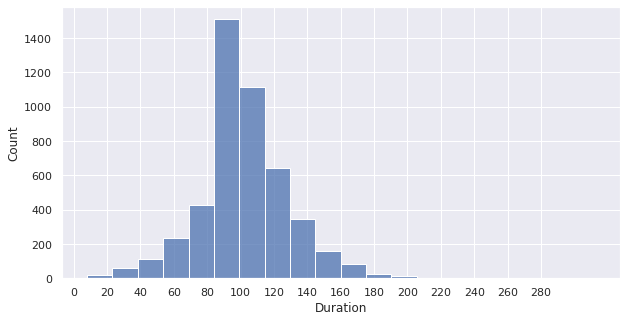

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(movies['duration'],bins=20)
plt.xlabel('Duration')
plt.xticks(range(0,300,20))

*People generally watch movies of duration between **80-120 mins**.Most of the audience can't watch a movie for 3 hrs in single sitting.*

## Movies having Longest Running Time

Text(0.5, 0, 'Duration (in mins)')

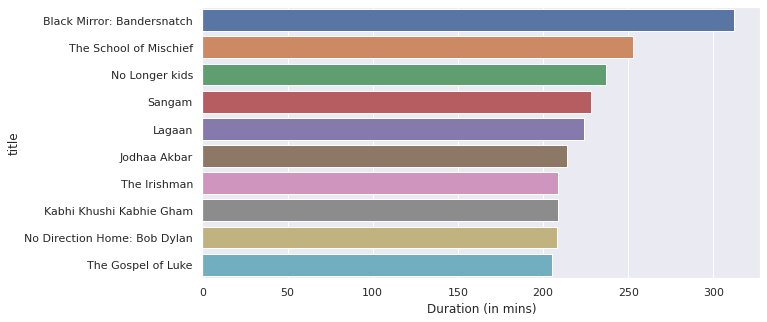

In [26]:
plt.figure(figsize=(10,5))
top=movies.sort_values('duration',ascending=False)
top10=top[:10]
sns.barplot(y='title',x='duration',data=top10)
plt.xlabel('Duration (in mins)')

***Black Mirror: Bandersnatch ,The School of Mischief and No Longer Kids*** *are amongst the movies having longest running time.*

 ## In which year maximum movies were released?

Text(0, 0.5, 'Year of Release')

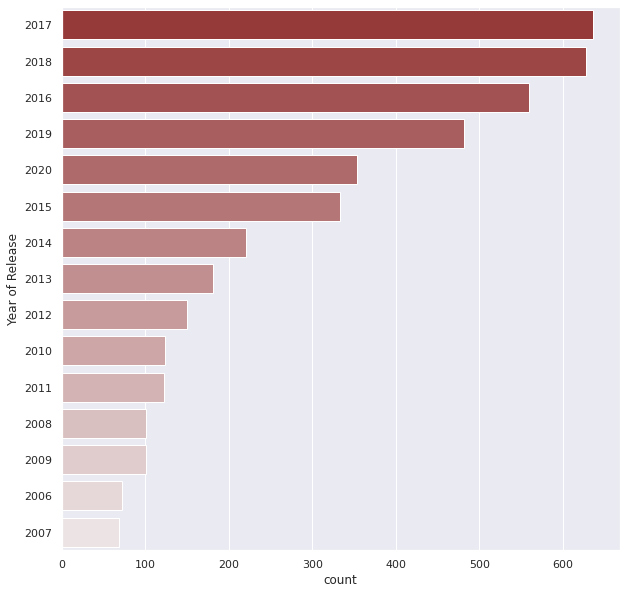

In [27]:
plt.figure(figsize=(10,10))
p=sns.light_palette(color='brown',n_colors=16,reverse=True)
sns.countplot(y='release_year',data=movies,palette=p,order=movies['release_year'].value_counts().index[:15])
plt.ylabel("Year of Release")

*In* ***2017*** *maximum movies were released.*

## In which year maximum movies were added on netflix?

Text(0, 0.5, 'Year of Addition on Netflix')

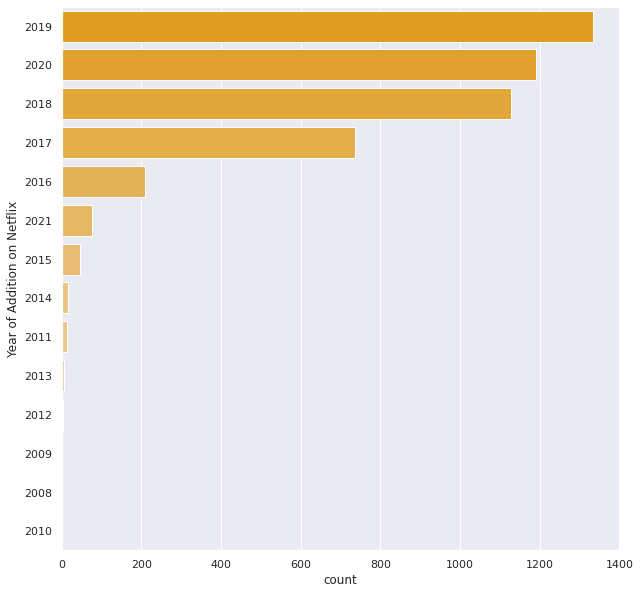

In [28]:
plt.figure(figsize=(10,10))
p=sns.light_palette(color='orange',n_colors=16,reverse=True)
sns.countplot(y='Added_Year',data=movies,palette=p,order=movies['Added_Year'].value_counts().index[:15])
plt.ylabel('Year of Addition on Netflix')

*In* ***2019*** *maximum movies were added on netflix.*

## Top 10 Movie producing countries on netflix

<AxesSubplot:xlabel='count', ylabel='country'>

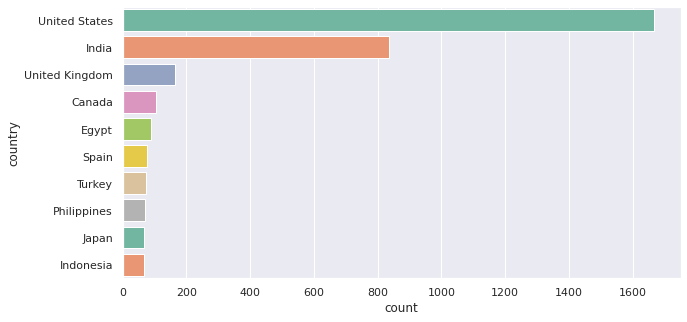

In [29]:
movies_max=movies.groupby('country')['type'].count().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10,5))
sns.countplot(y='country',palette='Set2',data=movies,order=movies_max)

***United States and India*** *produces majority of movies on Netflix.*

## Popular Genres in Movies

Text(0, 0.5, 'Genre')

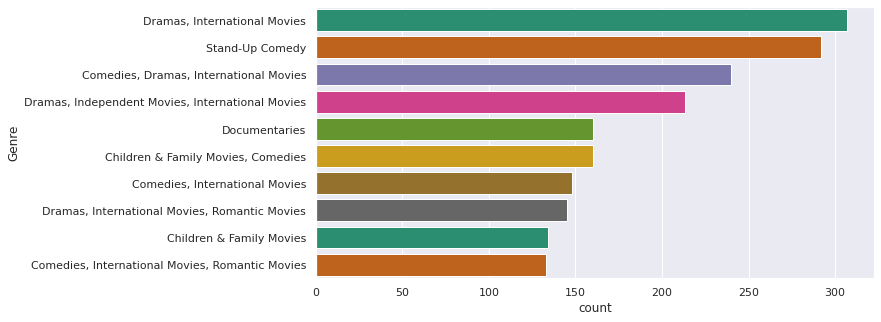

In [30]:
mov_genre=movies.groupby('listed_in')['type'].count().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10,5))
sns.countplot(y='listed_in',palette='Dark2',data=movies,order=mov_genre)
plt.ylabel('Genre')

*People like* ***movies which are international,which have drama followed by stand-up comedies.***

## Rating Analysis of Movies

Text(0, 0.5, 'Rating')

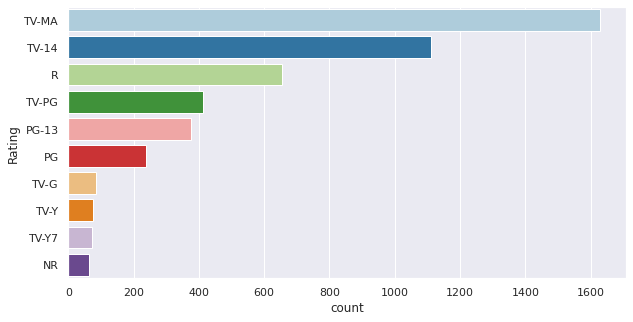

In [31]:
mov_rating=movies.groupby('rating')['type'].count().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10,5))
sns.countplot(y='rating',palette='Paired',data=movies,order=mov_rating)
plt.ylabel('Rating')

*Most of the movies have* ***TV-MA rating which means Mature Audience Only.This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.*** 

*Followed by* **TV-14 rating i.e. Parents Strongly Cautioned and only suitable for age 14 and above.**

*Least Rating is of* ***NR i.e.Not Rated Films.***

*as assigned by Motion Picture Association of America(MPAA).*

## Popular Movie Directors

In [32]:
#Top 20 popular movie directors
md=[i for i in movies.director if i!='Unknown']
mov_director_frequency = Counter(', '.join(md).split(', '))
print("Top 20 directors globally in Netflix:")
mov_director_frequency.most_common(20)

Top 20 directors globally in Netflix:


[('Jan Suter', 21),
 ('Raúl Campos', 19),
 ('Jay Karas', 15),
 ('Marcus Raboy', 14),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 10),
 ('Shannon Hartman', 9),
 ('David Dhawan', 9),
 ('Justin G. Dyck', 8),
 ('Umesh Mehra', 8),
 ('Hakan Algül', 8),
 ('Anurag Kashyap', 8),
 ('Johnnie To', 8),
 ('Yılmaz Erdoğan', 8),
 ('Robert Rodriguez', 8),
 ('Kunle Afolayan', 7),
 ('McG', 7)]

***Raul Campos*** and ***Jan Suter*** *has directed most of the movies.*

## Popular Movie Actors

In [33]:
#Top 20 popular movie actors
ma=[i for i in movies.cast if i!='Unknown']
mov_actor_frequency = Counter(', '.join(ma).split(', '))
print("Top 20 movie actors globally in Netflix:")
mov_actor_frequency.most_common(20)

Top 20 movie actors globally in Netflix:


[('Anupam Kher', 41),
 ('Shah Rukh Khan', 34),
 ('Om Puri', 30),
 ('Naseeruddin Shah', 29),
 ('Akshay Kumar', 29),
 ('Boman Irani', 27),
 ('Amitabh Bachchan', 27),
 ('Paresh Rawal', 27),
 ('Kareena Kapoor', 25),
 ('Ajay Devgn', 21),
 ('Salman Khan', 20),
 ('Adam Sandler', 19),
 ('Kay Kay Menon', 19),
 ('Nicolas Cage', 19),
 ('Samuel L. Jackson', 18),
 ('Anil Kapoor', 18),
 ('John Cleese', 18),
 ('James Franco', 18),
 ('Nawazuddin Siddiqui', 18),
 ('Gulshan Grover', 17)]

***Anupam Kher*** and ***Shah Rukh Khan*** *has starred in most of the movies amongst other popular actors.*

## TV SHOWS ANALYSIS

## After release when does Tv shows were added into netflix??

In [34]:
Tv_shows=show[show['type']=='TV Show']

In [35]:
Tv_shows['show_diff']=abs(Tv_shows['Added_Year']-Tv_shows['release_year'])
tv_show_diff_percent=Tv_shows['show_diff'].value_counts(normalize=True).sort_values(ascending=False)[:10]
tv_show_diff_percent*100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    49.734325
1    17.003188
2     7.863974
3     4.994687
4     3.878852
6     2.709883
5     2.603613
7     2.072264
8     1.647184
9     1.328374
Name: show_diff, dtype: float64

***49.7% of TV shows are either released on Netflix or they were added months after their release in the same year.***
Maybe some amount of them can be netflix originals.

***Followed by 17% of shows or movies are added on netflix after 1 year of their release.***

## For how many seasons does TV shows extend most of the time?

In [36]:
Tv_shows['duration']=Tv_shows['duration'].apply(lambda x:x.split(' Seasons')[0])
Tv_shows['duration']=Tv_shows['duration'].apply(lambda x:x.split(' Season')[0])
Tv_shows['duration']=Tv_shows['duration'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Text(0.5, 0, 'Seasons')

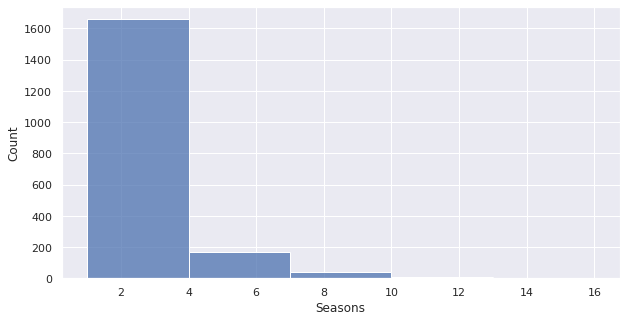

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(Tv_shows['duration'],bins=5)
plt.xlabel('Seasons')

*Most of the TV shows on netflix extend upto* ***2 to 4 seasons.*** 

## TV shows having the highest number of seasons

Text(0.5, 0, 'Seasons')

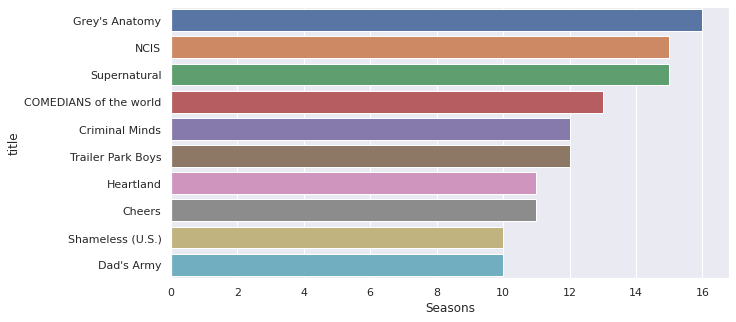

In [38]:
plt.figure(figsize=(10,5))
top=Tv_shows.sort_values('duration',ascending=False)
top10=top[:10]
sns.barplot(y='title',x='duration',data=top10)
plt.xlabel('Seasons')

***NCIS, Grey's Anatomy and Supernatural*** *are amongst the TV shows that have highest number of seasons.*

## In which year maximum TV shows were released?

Text(0, 0.5, 'Year of Release')

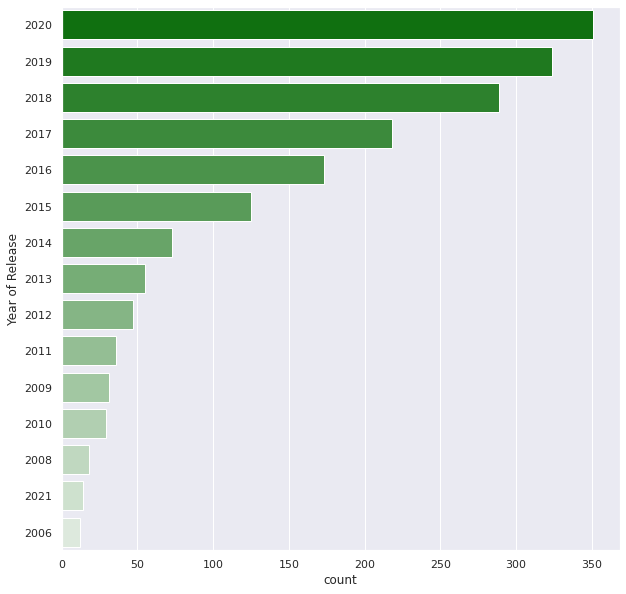

In [39]:
plt.figure(figsize=(10,10))
p=sns.light_palette(color='green',n_colors=16,reverse=True)
sns.countplot(y='release_year',data=Tv_shows,palette=p,order=Tv_shows['release_year'].value_counts().index[:15])
plt.ylabel("Year of Release")

*In* ***2020*** *maximum TV shows were released.*

## In which year maximum TV shows were added on netflix?

Text(0, 0.5, 'Year of Addition on Netflix')

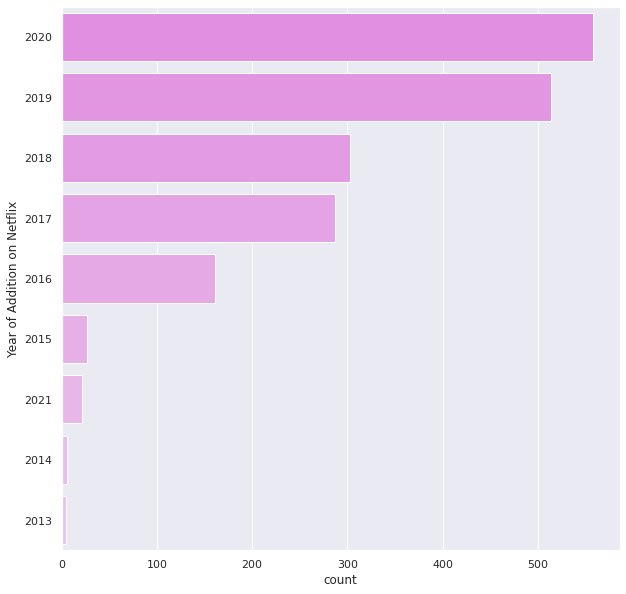

In [40]:
plt.figure(figsize=(10,10))
p=sns.light_palette(color='violet',n_colors=16,reverse=True)
sns.countplot(y='Added_Year',data=Tv_shows,palette=p,order=Tv_shows['Added_Year'].value_counts().index[:15])
plt.ylabel('Year of Addition on Netflix')

*In* ***2020*** *maximum TV shows were added on netflix.*

## Top 10 TV shows producing countries on netflix

<AxesSubplot:xlabel='count', ylabel='country'>

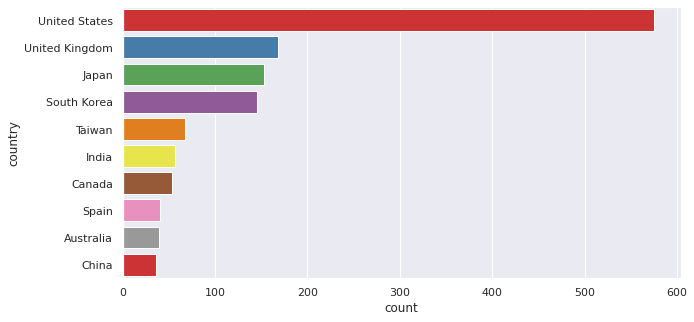

In [41]:
tv_max=Tv_shows.groupby('country')['type'].count().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10,5))
sns.countplot(y='country',palette='Set1',data=Tv_shows,order=tv_max)

***United States and United Kingdom*** *produces majority of TV shows on netflix.*

## Popular Genres in TV shows

Text(0, 0.5, 'Genre')

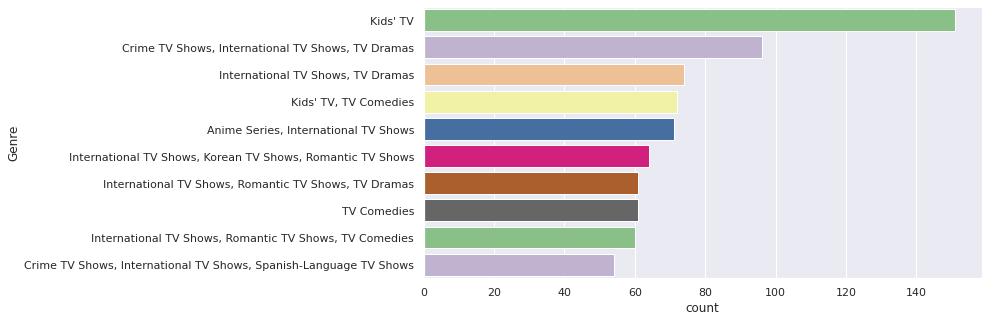

In [42]:
tv_genre=Tv_shows.groupby('listed_in')['type'].count().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10,5))
sns.countplot(y='listed_in',palette='Accent',data=Tv_shows,order=tv_genre)
plt.ylabel('Genre')

*It is seen that* ***Kids'TV is the most popular genre followed by Crime TV,Interational TV shows and TV Dramas***.

## Rating analysis of TV shows

Text(0, 0.5, 'Rating')

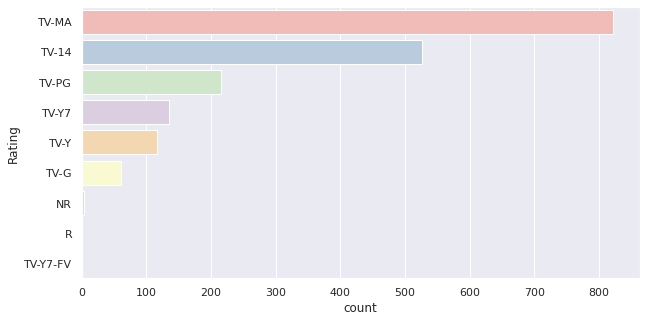

In [43]:
tv_rating=Tv_shows.groupby('rating')['type'].count().sort_values(ascending=False).index[:10]
plt.figure(figsize=(10,5))
sns.countplot(y='rating',palette='Pastel1',data=Tv_shows,order=tv_rating)
plt.ylabel('Rating')

*Most of the TV-shows have* ***TV-MA rating which means Mature Audience Only.This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.*** 

*Followed by* **TV-14 rating i.e. Parents Strongly Cautioned and only suitable for age 14 and above.**

*Least Rating is of* ***NR i.e.Not Rated Films.***

*as assigned by Motion Picture Association of America(MPAA).*

## Popular Directors of TV shows

In [44]:
#Top 20 popular tv shows directors
md=[i for i in Tv_shows.director if i!='Unknown']
tv_director_frequency = Counter(', '.join(md).split(', '))
print("Top 20 TV show directors globally in Netflix:")
tv_director_frequency.most_common(20)

Top 20 TV show directors globally in Netflix:


[('Alastair Fothergill', 3),
 ('Jung-ah Im', 2),
 ('Stan Lathan', 2),
 ('Rob Seidenglanz', 2),
 ('Iginio Straffi', 2),
 ('Shin Won-ho', 2),
 ('Serdar Akar', 1),
 ('Nizar Shafi', 1),
 ('Carla Barros', 1),
 ('Kazuya Murata', 1),
 ('Kyran Kelly', 1),
 ('Seung-uk Jo', 1),
 ('Juliana Vicente', 1),
 ('Peter Ho', 1),
 ('Hernán Guerschuny', 1),
 ('Andrucha Waddington', 1),
 ('Pedro Waddington', 1),
 ('Eric Abrams', 1),
 ('James Bamford', 1),
 ('BB Sasore', 1)]

***Alastair Fothergill*** *has directed more TV shows.*

## Popular TV shows actors

In [45]:
#Top 20 popular tv actors
md=[i for i in Tv_shows.cast if i!='Unknown']
tv_actor_frequency = Counter(', '.join(md).split(', '))
print("Top 20 TV show actors globally in Netflix:")
tv_actor_frequency.most_common(20)

Top 20 TV show actors globally in Netflix:


[('Takahiro Sakurai', 21),
 ('Yuki Kaji', 17),
 ('Daisuke Ono', 16),
 ('Ai Kayano', 15),
 ('Junichi Suwabe', 15),
 ('Yoshimasa Hosoya', 14),
 ('David Attenborough', 13),
 ('Hiroshi Kamiya', 13),
 ('Kana Hanazawa', 13),
 ('Yuichi Nakamura', 13),
 ('Jun Fukuyama', 12),
 ('Mamoru Miyano', 11),
 ('Ashleigh Ball', 11),
 ('Natsuki Hanae', 11),
 ('Tomokazu Sugita', 11),
 ('Vincent Tong', 11),
 ('Nobuhiko Okamoto', 10),
 ('Ryohei Kimura', 9),
 ('Miyuki Sawashiro', 9),
 ('Saori Hayami', 9)]

***Takahiro Sakurai*** *has acted in most TV shows amongst other popular actors.*

## Contribution of Countries Over Time

In [46]:
#creating a dummy dataframe
show_copy=show.copy(deep=True)

In [47]:
#creating an added date column
month={'January':'1','February':'2','March':'3','April':'4','May':'5','June':'6','July':'7','August':'8','September':'9',
       'October':'10','November':'11','December':'12'}
show_copy['Month']=show['Added_Month'].map(month)
show_copy.rename(columns={'Added_Year':'Year','Added_Day':'Day'},inplace=True)
show_copy['Added_Date'] = pd.to_datetime(show_copy[['Year', 'Month', 'Day']],format='%d%m%Y')

In [48]:
#dropping irrelevant columns
show_copy.drop(columns=['Year','Month','Day','show_diff'],inplace=True)

In [49]:
#generating top 20 countries by content using counter
md=[i for i in show_copy.country if i!='Unknown']
country_frequency = Counter(', '.join(md).split(', '))
countries=[]
for i ,j in country_frequency.most_common(20):
    countries.append(show_copy[show_copy['country']==i])

In [50]:
#converting the resultant counter object into dataframe
merged=pd.concat(countries)
merged=merged.dropna().reset_index().sort_values('Added_Date')
merged.drop(columns='index',axis=1,inplace=True)

In [51]:
#grouping countries by date of content added 
show_t=merged.groupby(['country']).count()['Added_Date'].sort_values(ascending=False)

In [52]:
#discovering trend using dropdown
buttons=[]

default_country='United States'

fig=go.Figure()

for i in show_t.index:
    df=merged[merged.country==i]
    fig.add_trace(go.Scatter(x=df['Added_Date'],name=i,visible=(i==default_country),mode='lines+markers',
                            hovertemplate="Date: %{x}<br>Number of Shows Added: %{y}"))
for country in show_t.index:
    buttons.append(dict(method='restyle',
                            label=country,
                            args = [{'visible': [country == r for r in show_t.index]}]))

# Add dropdown menus to the figure
fig.update_layout(title_text='Trend of Producing Content By Each Country',showlegend=False, 
                  updatemenus=[dict(buttons=buttons,direction='down', 
                                showactive=True)])

*This plot shows how the countries has produced content over time in netflix. Don't forget to use the drop down menu for other insights.*

In [53]:
buttons2=[]

default_type='Movie'

fig=go.Figure()

for i in show_t.index:
    df=merged[merged.country==i]
    fig.add_trace(go.Scatter(x=df['Added_Date'],name=i,mode='lines+markers',
                            hovertemplate="Date: %{x}<br>Number of Shows Added: %{y}"))

for t in merged.type.unique():
    buttons2.append(dict(method='restyle',
                            label=t,
                            args = [{'visible': [t == r for r in merged.type.unique()]}]))
    
# Add dropdown menus to the figure
fig.update_layout(title_text='Trend of Producing Content By Countries in Each Category',showlegend=False, 
                  updatemenus=[dict(buttons=buttons2,direction='down', 
                                showactive=True)])

## Choropleth Representation of different regions of world

In [54]:
# get sorted lists of country frequency and country names by country frequency
country_frequencies, country_names = zip(*sorted(zip(country_frequency.values(), 
                                                     country_frequency.keys()), 
                                                 reverse = True))
country_frequency_df = pd.DataFrame({"country": country_names, 
                                     "frequency": country_frequencies})

In [55]:
country_frequency_df.head()

,country,frequency
0,United States,2913
1,India,955
2,United Kingdom,632
3,Canada,382
4,France,319


*There are no iso3 or iso2 codes of countries to plot them on choropleth.Therefore,without including them from an another dataset we can make use of a library known as 'country_converter' to find all relevant details about any country.*

*More details at-https://pypi.org/project/country-converter/*

In [56]:
pip install country_converter

     |████████████████████████████████| 48 kB 1.9 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.2-py3-none-any.whl size=51547 sha256=fcac7b5a458a4679884547e663f3b62d8c1f09126e4978258731cad7171f4033
  Stored in directory: /root/.cache/pip/wheels/48/a2/c4/536e09649474ce5a1c3d100880cb6ed0891f2b1b8fa002752e
Successfully built country-converter
Note: you may need to restart the kernel to use updated packages.


In [57]:
#converting the country column into list
s=country_frequency_df.country.to_list()

In [58]:
#generating iso3 names of the countries
import country_converter as cc
iso_alpha=cc.convert(names=s,to='ISO3')

In [59]:
#putting it in dataframe
country_frequency_df['iso_codes']=iso_alpha

In [60]:
fig_1=px.choropleth(country_frequency_df,hover_name='country',scope='world',
              labels={'iso_codes':'ISO_CODE','frequency':'Content Produced'},
               title='Netflix Content Frequency Distribution around the world',locations='iso_codes',color='frequency',
             color_continuous_scale=px.colors.sequential.Purpor)
fig_1.show()

*As seen in the map,* ***USA(2913),India(955),UK(632),Canada(382),France(319)*** *has produced most number of contents in netflix*.

In [61]:
fig_2=px.choropleth(country_frequency_df,hover_name='country',scope='europe',
              labels={'iso_codes':'ISO_CODE','frequency':'Content Produced'},
               title='Netflix Content Frequency Distribution around Europe',locations='iso_codes',color='frequency',
             color_continuous_scale=px.colors.sequential.PuRd)
fig_2.show()

*In **Europe Region,United Kingdom(632)** has produced maximum content.*

In [62]:
fig_3=px.choropleth(country_frequency_df,hover_name='country',scope='asia',
              labels={'iso_codes':'ISO_CODE','frequency':'Content Produced'},
               title='Netflix Content Frequency Distribution around Asia',locations='iso_codes',color='frequency',
             color_continuous_scale=px.colors.sequential.PuRd)
fig_3.show()

*In **Asia Region,India(955**) has produced maximum content.*

In [63]:
fig_4=px.choropleth(country_frequency_df,hover_name='country',scope='north america',
              labels={'iso_codes':'ISO_CODE','frequency':'Content Produced'},
               title='Netflix Content Frequency Distribution around North America',locations='iso_codes',color='frequency',
             color_continuous_scale=px.colors.sequential.PuRd)
fig_4.show()

*In North **America Region,USA(2913)** produces maximum content.*

In [64]:
fig_5=px.choropleth(country_frequency_df,hover_name='country',scope='south america',
              labels={'iso_codes':'ISO_CODE','frequency':'Content Produced'},
               title='Netflix Content Frequency Distribution around South America',locations='iso_codes',color='frequency',
             color_continuous_scale=px.colors.sequential.PuRd)
fig_5.show()

*In **South America Region,Brazil(77) and Argentina(74)** has produced most of the content.*

In [65]:
fig_6=px.choropleth(country_frequency_df,hover_name='country',scope='africa',
              labels={'iso_codes':'ISO_CODE','frequency':'Content Produced'},
               title='Netflix Content Frequency Distribution around Africa',locations='iso_codes',color='frequency',
             color_continuous_scale=px.colors.sequential.PuRd)
fig_6.show()

*In **Africa Region,Egypt(109)** has produced maximum content.*


**UPVOTE AND SHARE IF YOU LIKE IT**

**DO PROVIDE YOUR VALUABLE FEEDBACK!!!**

**THANK YOU.**